In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
path = r'C:\\Users\\MikołajStryja\\Documents\\Studia\\siim-covid19-detection'
subdirs = [f for f in os.listdir(path)]
print(subdirs)
test = subdirs[1]
train = subdirs[2]
train_image_level = subdirs[3]
train_study_level = subdirs[4]
sample_submission = subdirs[0]

['sample_submission.csv', 'test', 'train', 'train_image_level.csv', 'train_study_level.csv']


In [38]:
len(os.listdir(os.path.join(path, test)))

1214

In [39]:
pd_ss = pd.read_csv(os.path.join(path, sample_submission))
len(pd_ss)

2477

In [9]:
# res = [row for row in pd_ss.iterrows() if not 'negative' is in row['PredictionString'] and not 'none' is in row['PredictionString']]

In [13]:
studies = [f for f in os.listdir(os.path.join(path, train))]

In [11]:
# from master_lib.loader.converter import get_dict_study_level, get_dict_image_level
pd_tsl = pd.read_csv(os.path.join(path, train_study_level))
pd_til = pd.read_csv(os.path.join(path, train_image_level))

In [22]:
N = len(pd_tsl)
cols = list(pd_tsl.columns)
a = pd_tsl[cols[1]]
b = pd_tsl[cols[2]]
c = pd_tsl[cols[3]]
d = pd_tsl[cols[4]]
s1, s2, s3, s4 = sum(a), sum(b), sum(c), sum(d)


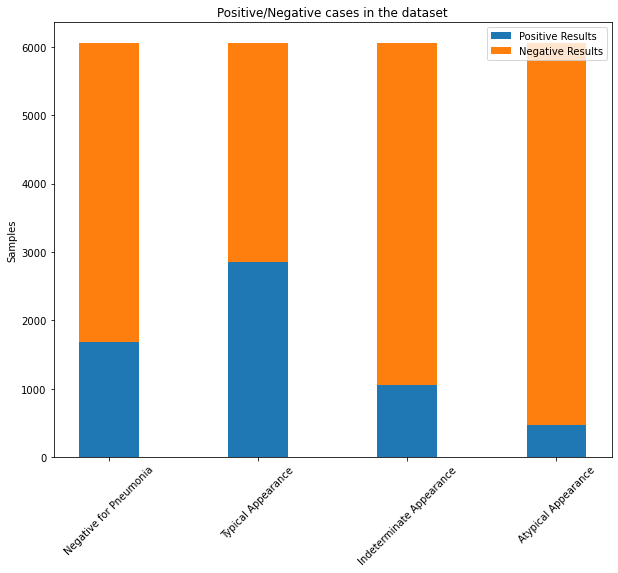

<Figure size 432x288 with 0 Axes>

In [29]:
import matplotlib.pyplot as plt
labels = [cols[1], cols[2], cols[3], cols[4]]
positive = [s1, s2, s3, s4]
negative = [N - s1, N - s2, N - s3, N - s4]
width = 0.4
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(labels, positive, width, label='Positive Results')
ax.bar(labels, negative, width, bottom=positive, label='Negative Results')

ax.set_ylabel('Samples')
ax.set_title('Positive/Negative cases in the dataset')
ax.legend()
plt.xticks(rotation=45)
plt.show()

master_img_path = r'C:\Users\MikołajStryja\Documents\Studia\do_magisterki_obrazy'
plt.savefig(os.path.join(master_img_path, 'dataset_balance.jpg'))

In [10]:
pd_til.head(5)

,id,boxes,label,StudyInstanceUID
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e


In [31]:
nan_boxes = pd_til[pd_til['boxes'].isna()]
len(nan_boxes)

2040

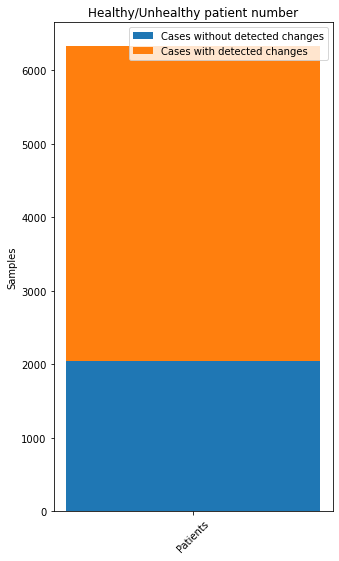

In [37]:
# All dataset balance
labels = ['Patients']
positive = [len(nan_boxes)]
negative = [len(pd_til) - len(nan_boxes)]
width = 0.2
fig, ax = plt.subplots(figsize=(5, 9))
ax.bar(labels, positive, width, label='Cases without detected changes')
ax.bar(labels, negative, width, bottom=positive, label='Cases with detected changes')

ax.set_ylabel('Samples')
ax.set_title('Healthy/Unhealthy patient number')
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [6]:

tsl_colums = list(pd_tsl)
pd_tsl_dict = {}
for elem in pd_tsl.iterrows():
    temp = get_dict_study_level(elem[1], tsl_colums)
    pd_tsl_dict[temp[0]] = temp[1:]


NameError: name 'get_dict_study_level' is not defined

In [5]:

til_columns = list(pd_til.columns)
pd_til_dict = {}
for elem in pd_til.iterrows():
    print(elem[1])
    temp = get_dict_image_level(elem[1], til_columns)
    print(temp)
    pd_tsl_dict[temp[0]] = temp[1:]

id                                                 000a312787f2_image
boxes               [{'x': 789.28836, 'y': 582.43035, 'width': 102...
label               opacity 1 789.28836 582.43035 1815.94498 2499....
StudyInstanceUID                                         5776db0cec75
Name: 0, dtype: object


NameError: name 'get_dict_image_level' is not defined

In [27]:
dataset = {}
for x in studies:
    series = [f for f in os.listdir(os.path.join(path, train, x))][0]
    images = [f for f in os.listdir(os.path.join(path, train, x, series))]
    dataset[images[0].split('.')[0]] = pd_tsl_dict[]

['65761e66de9f.dcm']
['51759b5579bc.dcm']
['f6293b1c49e2.dcm']
['3019399c31f4.dcm']
['bb4b1da810f3.dcm']
['3fadf4b48db3.dcm']
['bf1f75117093.dcm']
['1df3e98f79be.dcm']
['ad8d4a5ba8f0.dcm']
['09cf9767a7bf.dcm']
['12a2dfb55b6f.dcm']
['bcd2179fa24e.dcm']
['136af218f8df.dcm']
['7e7d3afebf5d.dcm']
['45742200dd51.dcm']
['b81969467c6b.dcm']
['6534a837497d.dcm']
['b98508598396.dcm']
['92552b44c70c.dcm']
['390ce1f029e7.dcm']
['f8ded2e15154.dcm']
['1ebbe0481d58.dcm']
['31376011baec.dcm']
['46e85d849bcb.dcm']
['f5451a98d684.dcm']
['6b730a1a4271.dcm']
['336db847af0e.dcm']
['204f98b6eaa0.dcm']
['e498491b1526.dcm']
['c6242c90cf2d.dcm']
['f87b978285e8.dcm']
['4b79ad26c2bd.dcm']
['696a6fb47142.dcm']
['90e192f887df.dcm']
['30124d722883.dcm']
['f873979cc0a8.dcm']
['3ad8424be8d9.dcm']
['9f693a11cdaf.dcm']
['e17e3f746f0f.dcm']
['178fd15298b1.dcm']
['a6271199f75f.dcm']
['89c3baa32546.dcm']
['5278186e7151.dcm']
['f782a61c168f.dcm']
['9db8a85a79c7.dcm']
['a82f4bf3f6be.dcm']
['5726df771382.dcm']
['d014ad56b32